In [1]:
import numpy as np
import pandas as pd
import statistics as stat
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
## FOR BASE TPG
def runAgent(args):
    agent = args[0]
    envName = args[1]
    scoreList = args[2]
    numEpisodes = args[3] # number of times to repeat game
    numFrames = args[4] 
    gen = args[5]
    env = args[6]
    
    # skip if task already done by agent
    if agent.taskDone(envName):
        print('Agent #' + str(agent.agentNum) + ' can skip.')
        scoreList.append((agent.team.id, agent.team.outcomes))
        return

    valActs = 4
    
    # create environment object from above
    scoreTotal = 0
    for ep in range(numEpisodes):
        state = env.reset()
        scoreEp = 0
        states = []

        if numEpisodes > 1:
            for i in range(numFrames): # frame loop           
                # action selection
                act = agent.act(state)
                
                state, reward, isDone = env.step(act)
                scoreEp += reward
                
                if isDone:
                    print('win!')
                    print(states)
                    break
                    
            print('Agent #' + str(agent.agentNum) + 
              ' | Ep #' + str(ep) + ' | Score: ' + str(scoreEp))
            
        scoreTotal += scoreEp
    scoreTotal /= numEpisodes
    env.close()
    agent.reward(scoreTotal, envName)
    scoreList.append((agent.team.id, agent.team.outcomes))
    if isDone:
        return
#     else:
#         return 0

In [3]:
class Figure9:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                      legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = 20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            
            if (next == (1, 6)) or (next == (2, 6)) or (next == (3, 6)) or (next == (5, 2)) or (next == (5, 3)) or (next == (5, 4)) or (next == (5, 5)) or (next == (4, 9)) or (next == (4, 8)) or (next == (5, 8)) or (next == (6, 8)) or (next == (6, 5)) or (next == (7, 5)) or (next == (8, 5)) or (next == (9, 5)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward += 0.1
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += self.goal_reached
            #reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((10, 10))
        # add barrier
        current_map[(1, 6)] = 5
        current_map[(2, 6)] = 5
        current_map[(3, 6)] = 5
        current_map[(4, 9)] = 5
        current_map[(4, 8)] = 5
        current_map[(5, 8)] = 5
        current_map[(6, 8)] = 5
        current_map[(5, 2)] = 5
        current_map[(5, 3)] = 5
        current_map[(5, 4)] = 5
        current_map[(5, 5)] = 5
        current_map[(6, 5)] = 5
        current_map[(7, 5)] = 5
        current_map[(8, 5)] = 5
        current_map[(9, 5)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [4]:
# will use Downing fig 11 for testing on this
class Figure11:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                    legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.memory = []
        self.memory_position = 0
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (1, 2)) or (next == (1, 3)) or (next == (2, 2)) or (next == (2, 3)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward += 0.1
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += self.goal_reached
            #reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(1, 2)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 2)] = 5
        current_map[(2, 3)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [5]:
# will use Downing fig 12 for testing on this
class Figure12:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                      legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (2, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 1
        
        if self.check_win():
            reward += self.goal_reached
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(2, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [6]:
# will use Downing fig 13 for testing on this
class Figure13:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                      legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def reset (self):
        self.current_state = self.start_state
        self.memory = []
        self.memory_position = 0
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (3, 3)) or (next == (3, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += self.goal_reached
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
#         print(self.current_state)
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(3, 3)] = 5
        current_map[(3, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [7]:
def evaluate (team, state, epsilon):
    top_learner = None
    action = None
    
    # get best learner
    actVars = {'frameNum':random.randrange(0, 100000000)}

    valid_learners = [lrnr for lrnr in team.learners if lrnr.isActionAtomic()]
#     valid_learners = [lrnr for lrnr in team.learners]

#     for test in valid_learners:
#         print(test.numTeamsReferencing)
    
    top_learner = max(valid_learners, key=lambda lrnr: lrnr.bid(state, actVars=actVars)) #how does this work??
    
    if top_learner == None:
        print('No top learner found!')
        return None, 0
    else:
        actions = []
        top_q = 0
        top_action = None
        
        for entry in team.q_table:
            if entry['learner'] == str(top_learner.id):
                actions.append(entry['action'])
                if entry['q'] >= top_q: # greater than OR greater than or equal to??
                    top_q = entry['q']
                    top_action = entry['action']            
#         print('------------------------')
#         print('action code: ' + str(top_learner.actionObj.actionCode))
#         print('Actions:')
#         print(actions)
#         print('------------------------')
        # e greedy action selection
        e_prob = random.uniform(0, 1)
        
#         if (len(actions) == 0):
#             print('NO ACTIONS!!!!!!')
#             print(team.learners)
#             for entry in team.q_table:
#                 print(entry)
#                 print('-')
#             print('NO ACTIONS!!!!!!')

        if e_prob < epsilon:
            if len(actions) == 1:
                action = actions[0]
            else:
                rand_action = random.randint(0, len(actions)-1)
                action = actions[rand_action]
        else:
            # select action with highest q value from top learner's actions
            action = top_action
        
    #print(action)
    return top_learner, action

In [8]:
def update (team, next_learner, action, learner, reward, alpha, discount):
    
    # find the greatest q value out of possible actions for learner t+1
    second_max_q = 0
    for second_learner in team.q_table:
        if second_learner['learner'] == str(next_learner.id):
            if second_learner['q'] > second_max_q:
                second_max_q = second_learner['q']
    
    # find the current learner and q update
    for first_learner in team.q_table:
        if first_learner['learner'] == str(learner.id) and first_learner['action'] == action:
            # equation 1 from tpg pdf
            first_learner['q'] += alpha * (reward + (discount * second_max_q) - first_learner['q'])

In [9]:
def final_update (team, action, learner, reward, alpha):
    # find the current learner and q update
    for first_learner in team.q_table:
        if first_learner['learner'] == str(learner.id) and first_learner['action'] == action:
            # equation 2 from tpg pdf
            first_learner['q'] += alpha * (reward - first_learner['q'])

In [10]:
def evaluate_fitness (env_name, agent, env, epsilon, alpha, discount):
    l_t, a_t = evaluate(agent.team, env.current_state, epsilon)
    t = 0
#     if env_name == 'fig9':
#         t_max = 100
#     else:
#         t_max = 50
    t_max = 100
    total_reward = 0
    while t < t_max:
        # zero registers
        agent.zeroRegisters()
        
        s_next, reward, isDone = env.step(a_t)
        total_reward += reward
        if isDone:
            # new tpg-td pdf stuff
            final_update(agent.team, a_t, l_t, reward, alpha)
            
            return total_reward, True
        
        l_next, a_next = evaluate(agent.team, env.current_state, epsilon)
        
        if l_t.id != l_next.id:
            update(agent.team, l_next, a_t, l_t, reward, alpha, discount)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return total_reward, False

In [11]:
# tpg imports
# import to do training
from tpg.trainer import Trainer
# import to run an agent (always needed)
from tpg.agent import Agent
# visual tools
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
# for writing
import csv
from datetime import date

In [12]:
# actions distribution tracker
# each index corresponds to its actions
# the values are the amount of times that action has been sampled
# action_counts = [0, 0, 0, 0]
# current_distribution = []

def action_distribution(counts):
    total = 0
    proportions = []
    for action in counts:
        proportion = 1 / action
        proportion = int(proportion * 10 * sum(counts))
        total += proportion
        proportions.append(proportion)
    
    return total, proportions  

# this function will sample actions in a way that is biased to the least sampled actions
def sample_action(total, proportions):
    
    sample = random.randint(1, total)
    
    if (sample > 1) and (sample <= proportions[0]):
        return 0
    elif (sample > proportions[0]) and (sample <= proportions[0] + proportions[1]):
        return 1
    elif (sample > proportions[0] + proportions[1]) and (sample <= proportions[0] + proportions[1] + proportions[2]):
        return 2
    else:
        return 3

In [13]:
# counts = [0, 0, 0, 0]
# dist_total, dist = action_distribution([1, 3, 4, 5])
# for i in range(100):
#     sample = sample_action(dist_total, dist)
#     if sample == 0:
#         counts[0] += 1
#     elif sample == 1:
#         counts[1] += 1
#     elif sample == 2:
#         counts[2] += 1
#     elif sample == 3:
#         counts[3] += 1
# print(counts)

In [14]:
action = random.randint(0, 3)
opposite = 0
if action == 0:
    opposite = 1
elif action == 2:
    opposite = 3
elif action == 3:
    opposite = 2
print(action)
print(opposite)

1
0


In [15]:
# q table helper functions
def create (agents, gen, opposite_action_samples):
    for agent in agents:
        team = agent.team
        for learner in team.learners:
            if opposite_action_samples == 0:
            # randomize actions of the learners
                action_list = [0, 1, 2, 3]

                random.shuffle(action_list)
#                 actions = random.randint(2,4)
                actions = 2
            else:
                action = random.randint(0, 3)
                opposite = 0
                if action == 0:
                    opposite = 1
                elif action == 2:
                    opposite = 3
                elif action == 3:
                    opposite = 2

                action_list = [action, opposite]
                actions = len(action_list)
            
            for i in range(actions):
                (team.q_table).append({'learner': str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen})
                action_counts[action_list[i]] += 1
    return action_counts

# add new learners upon evolution
def evolve (agents, lamarckian, gen, action_counts, action_dist_total, action_dist, opposite_action_samples):
    if gen % 5 == 0:
        action_dist_total, action_dist = action_distribution(action_counts)
    
    for agent in agents:
        team = agent.team
        for learner in team.learners:   
            
            found = 0
            for entry in team.q_table:
                if entry['learner'] == str(learner.id):
                    found = 1
            # found == 0 here indicates that the learner has not yet been added to the q table,
            # thus it must be a new learner, so we add it to the q table
            # if lamarckian is 1, then the new learner will inherit the characteristics of its parents
            # here, those characteristics are the parents actions with the corresponding q value
            # without lamarckian, we just assign random actions with q values set to 0
            if found == 0:
                if lamarckian == 0:
                    # let the actions converge a bit before sampling
                    if (gen > 1000000000):#if (gen > 30):
                        # new way of sampling!
                        actions = random.randint(1,4)
                        action_list = []
                        for i in range(actions):
                            action_list.append(sample_action(action_dist_total, action_dist))
                    else:
                        if opposite_action_samples == 0:
                            action_list = [0, 1, 2, 3]
                            random.shuffle(action_list)
#                             actions = random.randint(1,4)
                            actions = 2
                        else: 
                            action = random.randint(0, 3)
                            opposite = 0
                            if action == 0:
                                opposite = 1
                            elif action == 2:
                                opposite = 3
                            elif action == 3:
                                opposite = 2

                            action_list = [action, opposite]
                            actions = len(action_list)
                        
                    for i in range(actions):
                            (team.q_table).append({'learner':str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen, 'lamarck':0})
                            action_counts[entry['action']] += 1
                            
                elif lamarckian == 1:
                    parent_actions = []

                    if team.parentTeam:
                        # grab the actions from the parent learner
                        parent_actions = [entry for entry in (team.parentTeam).q_table if entry['learner'] == str(learner.id) and entry['gen'] == gen-1] 

                    if parent_actions:
                        for entry in parent_actions:
                            (team.q_table).append({'learner':str(learner.id), 'action':entry['action'], 'q':entry['q'], 'gen':gen, 'lamarck':1})
                            # increment the sampled actions count
                            action_counts[entry['action']] += 1
                    else:
                        if opposite_action_samples == 0:
#                         # let the actions converge a bit before sampling
                            if (gen > 10000000):
                                # new way of sampling!
                                actions = random.randint(2,4)
                                actions = 2
                                action_list = []
                                for i in range(actions):
                                    action_list.append(sample_action(action_dist_total, action_dist))
                            else:
                                action_list = [0, 1, 2, 3]
                                random.shuffle(action_list)
                                actions = random.randint(2,4)
                        else:
                            action = random.randint(0, 3)
                            opposite = 0
                            if action == 0:
                                opposite = 1
                            elif action == 2:
                                opposite = 3
                            elif action == 3:
                                opposite = 2
                            action_list = [action, opposite]
                            actions = len(action_list)

                        for i in range(actions):
                            (team.q_table).append({'learner':str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen, 'lamarck':0})
                            action_counts[entry['action']] += 1

    return action_counts, action_dist, action_dist_total, agents


def clean (agents, current_gen):
    for agent in agents:
        team = agent.team
        for entry in team.q_table:
            if entry['gen'] < (current_gen):
                (team.q_table).remove(entry)

In [16]:
# obstacles: (1, 6) & (2, 6) & (3, 6) & (3, 6) & (5, 2) & (5, 3) & (5, 4) & (5, 5) & (4, 9) & (4, 8) & (5, 8) & (6, 8) & (6, 5) & (7, 5) & (8, 5) & (9, 5)
def fig9_sample_starts ():
    x = random.randint(0, 9)
    y = random.randint(0, 9)
    start = (x, y)
    if (start == (1, 6)) or (start == (2, 6)) or (start == (3, 6)) or (start == (5, 2)) or (start == (5, 3)) or (start == (5, 4)) or (start == (5, 5)) or (start == (4, 9)) or (start == (4, 8)) or (start == (5, 8)) or (start == (6, 8)) or (start == (6, 5)) or (start == (7, 5)) or (start == (8, 5)) or (start == (9, 5)):
        start = fig11_sample_starts()
    return start

In [17]:
# obstacles: (1, 2) & (1, 3) & (2, 2) & (2, 3)
def fig11_sample_starts ():
    x = random.randint(0, 4)
    y = random.randint(0, 4)
    start = (x, y)
    if (start == (1, 2)) or (start == (1, 3)) or (start == (2, 2)) or (start == (2, 3)):
        start = fig11_sample_starts()
    return start

In [18]:
# obstacles: (2, 0) & (1, 1) & (2, 1) & (1, 3) & (2, 3) & (2, 4)
def fig12_sample_starts ():
    x = random.randint(0, 4)
    y = random.randint(0, 4)
    start = (x, y)
    if (start == (2, 0)) or (start == (1, 1)) or (start == (2, 1)) or (start == (1, 3)) or (start == (2, 3)) or (start == (2, 4)):
        start = fig12_sample_starts()
    return start

In [19]:
# obstacles: (2, 0) & (1, 1) & (2, 1) & (1, 3) & (2, 3) & (3, 3)  & (3, 4)
def fig13_sample_starts ():
    x = random.randint(0, 4)
    y = random.randint(0, 4)
    start = (x, y)
    if (start == (2, 0)) or (start == (1, 1)) or (start == (2, 1)) or (start == (1, 3)) or (start == (2, 3)) or (start == (3, 3)) or (start == (3, 4)):
        start = fig13_sample_starts()
    return start

In [20]:
runs = 1#20
num_gen = 100
lamarckian = 1
save = 0
put_away = 0#1
base_gp = 0
random_starts = 0
opposite_action_samples = 0
progressing_goal = 1

actions = 4
teamPopSize = 50
pActAtom = 1.0

pLrnDel=0.3#0.7
pLrnAdd=0.2#0.7
pLrnMut=0.7#0.3
pProgMut=0.5#0.66
pActMut=0.0#0.7#0.33
pInstDel=0.5
pInstAdd=0.5
pInstSwp=0.5
pInstMut=0.5

initMaxProgSize = 64 #24
nRegisters = 8 #4
nActRegisters = 0
initMaxActProgSize = 0

initMaxTeamSize = 2
maxTeamSize = 4#5#4
gap = 0.5

for run in range(runs):
    print(run)
    trainer = Trainer(actions=actions, teamPopSize=teamPopSize, pActAtom=pActAtom, 
                      nRegisters=nRegisters, initMaxProgSize=initMaxProgSize, 
                      initMaxActProgSize=initMaxActProgSize, nActRegisters=nActRegisters,
                      
                        pLrnDel=pLrnDel, pLrnAdd=pLrnAdd, pLrnMut=pLrnMut, pProgMut=pProgMut, pActMut=pActMut,
                        pInstDel=pInstDel, pInstAdd=pInstAdd, pInstSwp=pInstSwp, pInstMut=pInstMut,
                      
                      initMaxTeamSize=initMaxTeamSize, maxTeamSize=maxTeamSize, gap=gap) 

    # init environment
    memorySize = 20
    legalMove = 0.1
    illegalMove = -0.01
    outOfBounds = -0.01
    memoryRepeat = -0.01
    goalReached = 100

#     envName = 'randomstartsfig9'
#     envName = 'fig9'
#     env = Figure9(10, 10, (5, 9), (9, 3), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'fig11'
#     envName = 'basegpfig11'
#     envName = 'randomstartsfig11'
#     envName = 'randomstartsfig12'
#     envName = 'randomstartsfig13'
#     env = Figure11(5, 5, (0, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'fig12'
#     envName = 'basegpfig12'
#     env = Figure12(5, 5, (0, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
    envName = 'fig13'
#     envName = 'oppositesamplesfig13'
#     envName = 'basegpfig13'
#     envName = 'randomstartsbasegpfig13'
#     env = Figure13(5, 5, (2, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'leftgoalfig12'
#     env = Figure12(5, 5, (0, 0), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'leftgoalfig13'
#     env = Figure13(5, 5, (2, 0), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
    starts = []

    # init tracking tools
    allScores = []
#     num_gen = 50
    champion = None
    best_score = -10000000

    # parameters
    alpha = 0.1 #0.05
    epsilon = 0.1
    discount = 0.9 #0.45

    # init samplers
    action_counts = [1, 1, 1, 1]
    action_dist = [0, 0, 0, 0]
    action_dist_total = 0
    
#     dones = []
    for gen in range(num_gen):
        
        print('--------------')
        print(f'Gen: {gen}')
        
        if progressing_goal == 1:
            if gen > 50:
                env = Figure13(5, 5, (2, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
            else:
                env = Figure13(5, 5, (0, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
        
        # keep random starts the same for each generation 
        if random_starts == 1:
            if envName == 'randomstartsfig11':
                start = fig11_sample_starts()
                starts.append(start)
                env = Figure11(5, 5, (0, 4), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
            elif envName == 'randomstartsfig12':
                start = fig12_sample_starts()
                starts.append(start)
                env = Figure12(5, 5, (0, 4), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
            elif (envName == 'randomstartsfig13') or (envName == 'randomstartsbasegpfig13'):
                start = fig13_sample_starts()
                starts.append(start)
                env = Figure13(5, 5, (2, 4), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
            elif (envName == 'randomstartsfig9'):
                start = fig9_sample_starts()
                starts.append(start)
                env = Figure9(10, 10, (5, 9), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)

        agent_track = 0
#         print(gen)
        # keep track of starts
        if (random_starts == 1):
            print(start)
        best_score = -10000000
        scoreList = []
        #print('gen' + str(gen))
        agents = trainer.getAgents()

        # update q table with new populations
        if base_gp != 1:
            if gen == 0:
                actions_counts = create(agents, gen, opposite_action_samples)
            else:
                print(agents[0].team.q_table)
                action_counts, action_dist, action_dist_total, new_agents = evolve(agents, lamarckian, gen, 
                                                                       action_counts, action_dist_total, 
                                                                       action_dist, opposite_action_samples)
                agents = new_agents
                print(agents[0].team.q_table)

        for agent in agents: 
            print(f'Agent Team ID: {agent.team.id}')
            fitnesses = []
            agent.zeroRegisters()
            team = agent.team
            env.reset()
            
            # for just running normal tpg
            if base_gp == 1:
                runAgent([agent, envName, scoreList, 10, 100, gen, env])
                
                if (scoreList[agent_track][1][envName] > best_score): #and (run != 0):
                    best_score = scoreList[agent_track][1][envName]
                    champ_agent = agent
                agent_track += 1
                
            else:
                # keep track of which agents have finished task
#                 dones = []
                numEpisodes = 10
                # check if the agent has already won
                # if it has, skip
                # if not, go!
#                 already_done = False
#                 for i in range(len(dones)):
#                     if str(dones[i]) == str(agent.agentNum):
#                         already_done = True

#                 if agent.taskDone(envName):
#                     print(f'agent has already completed task! Agent ID: {agent.agentNum}')
#                     scoreList.append((agent.team.id, agent.team.outcomes))
#                 else:
                for i in range(numEpisodes):
                    env.reset()
                    fitness, win = evaluate_fitness(envName, agent, env, epsilon, alpha, discount)
                    fitnesses.append(fitness)
                    # save champion for each run
                    if fitness > best_score:
                        best_score = fitness
                        champ_agent = agent

                    # apply scores
                    agent.reward(fitness, envName)
                    scoreList.append((agent.team.id, agent.team.outcomes))

                    if win and gen > 50:
#                             dones.append(agent.agentNum)
                        win_id = random.randint(0, 10000000)
                        print('WINNER!')
                        print(win_id)
                        agent.saveToFile(f'wins/win_{win_id}.pkl')
                        print(agent.team.id)
                        for q_value in agent.team.q_table:
                            print(str(q_value['learner']) + ' ' + str(q_value['action']) + ' ' + str(q_value['q']))
                        # we're done, no need to keep going
                        break        

        # evolution :)
        teams = trainer.applyScores(scoreList)
        trainer.evolve(tasks=[envName])

        # scores!
        scoreStats = trainer.fitnessStats

        print('agent: ' + str(scoreStats['max']))
        print('my:  ' + str(best_score))
        print('---------------')
        
        # find medians
        if base_gp == 0:
            median = stat.median(fitnesses)
            allScores.append((scoreStats['min'], scoreStats['max'], scoreStats['average'], median))
        else:
            allScores.append((scoreStats['min'], scoreStats['max'], scoreStats['average']))
        
        # save champ for this generation
        #champ_agent.saveToFile('champions/'+str(gen)+'.pk1')
        
        if put_away == 1:
            print(champ_agent.team.q_table)
            champ_agent.saveToFile(f'saved-runs/{envName}_{memorySize}_{legalMove}_{illegalMove}_{outOfBounds}_{memoryRepeat}_{goalReached}_{teamPopSize}_{pActAtom}_{nRegisters}_{initMaxProgSize}_{nActRegisters}_{initMaxActProgSize}_{initMaxTeamSize}_{maxTeamSize}_{gap}_{pLrnDel}_{pLrnAdd}_{pLrnMut}_{pProgMut}_{pActMut}_{pInstDel}_{pInstAdd}_{pInstSwp}_{pInstMut}_{lamarckian}_{epsilon}_{alpha}_{discount}_{run}_{gen}.pk1')
            if random_starts == 1:
                df = pd.DataFrame({
                    'starts': starts
                })
                df.to_csv(f'saved-figures/{envName}_starts_{gen}.csv')
        
    # collect average and max scores to save to csv
    if save == 1:
        averages = []
        maxes = []
        medians = []
        for score in allScores:
            averages.append(score[2])
            maxes.append(score[1])    
            medians.append(score[3])

        df = pd.DataFrame({
            'average_score': averages,
            'max_score': maxes,
            'median_score': medians
        })

        if lamarckian == 0:
            df.to_csv('../results/'+str(envName)+'/qtpg/'+str(run)+'.csv')
        else:
            df.to_csv('../results/'+str(envName)+'/lqtpg/'+str(run)+'.csv')
    
    # more advanced saving
    if put_away == 1:
        if base_gp == 0:
            averages = []
            maxes = []
            medians = []
            for score in allScores:
                averages.append(score[2])
                maxes.append(score[1])    
                medians.append(score[3])

            df = pd.DataFrame({
                'average_score': averages,
                'max_score': maxes,
                'median_score': medians,
            })

            df.to_csv(f'saved-figures/{envName}_{memorySize}_{legalMove}_{illegalMove}_{outOfBounds}_{memoryRepeat}_{goalReached}_{teamPopSize}_{pActAtom}_{nRegisters}_{initMaxProgSize}_{nActRegisters}_{initMaxActProgSize}_{initMaxTeamSize}_{maxTeamSize}_{gap}_{pLrnDel}_{pLrnAdd}_{pLrnMut}_{pProgMut}_{pActMut}_{pInstDel}_{pInstAdd}_{pInstSwp}_{pInstMut}_{lamarckian}_{epsilon}_{alpha}_{discount}_{run}.csv')
        else:
            averages = []
            maxes = []
            for score in allScores:
                averages.append(score[2])
                maxes.append(score[1])    

            df = pd.DataFrame({
                'average_score': averages,
                'max_score': maxes,
            })

            df.to_csv(f'saved-figures/{envName}_{memorySize}_{legalMove}_{illegalMove}_{outOfBounds}_{memoryRepeat}_{goalReached}_{teamPopSize}_{pActAtom}_{nRegisters}_{initMaxProgSize}_{nActRegisters}_{initMaxActProgSize}_{initMaxTeamSize}_{maxTeamSize}_{gap}_{pLrnDel}_{pLrnAdd}_{pLrnMut}_{pProgMut}_{pActMut}_{pInstDel}_{pInstAdd}_{pInstSwp}_{pInstMut}_{lamarckian}_{epsilon}_{alpha}_{discount}_{run}.csv')


0
--------------
Gen: 0
Agent Team ID: 6a710f8e-564a-472b-9f8b-afdf5bb1e192
Agent Team ID: c9552057-c8f9-4116-950e-77be20496021
Agent Team ID: 67036db6-c665-4a44-86c0-33f6fca37737
Agent Team ID: 7f2e066c-dbb8-4042-b024-c8ac27c3a9d1
Agent Team ID: 381e1a9b-9116-48e9-830b-b76282bf5653
Agent Team ID: 3400d557-6e3d-436a-828c-70d236f722ef
Agent Team ID: a5ab2cdb-6619-451e-b804-7b5d5dca3387
Agent Team ID: 6701fa13-37f0-45a9-9f6f-d90f597ed5ba
Agent Team ID: f3750a54-984b-4033-85e8-db6f5b497a7a
Agent Team ID: 32d6b350-fc4a-4fba-9e02-43b056f98851
Agent Team ID: 206b0332-fa43-428a-b56d-63886e274c56
Agent Team ID: 55d1506b-0683-4192-a703-8bedd9ca6a1f
Agent Team ID: 36abb712-87b7-4200-be8c-87b00c5d0a99
Agent Team ID: ad86fa9f-03b9-4571-b6f1-4b2ac19f32e8
Agent Team ID: c49a15ee-3684-48a5-be90-3e289ee219ae
Agent Team ID: 23c00bdf-3977-4ce6-b149-8c51df07d047
Agent Team ID: 915458c8-6c5d-4334-bccc-7c379c026439
Agent Team ID: 513b59a7-c74c-42a7-a774-51c9cb9ed425
Agent Team ID: e695e4c0-700f-48fc-bb7c-9

Agent Team ID: 53447e6b-0a24-40fa-8e7a-1c430d3ff85c
Agent Team ID: 9c59f34c-1f21-4895-a6e2-6c804fb9d60e
Agent Team ID: fbcd0789-0797-4558-9683-c7f5ff34a608
Agent Team ID: 4d7f7b30-40b8-4a46-9f74-d11f2814f091
Agent Team ID: 9daa3c69-f980-454a-831b-0d2575e6f1e2
Agent Team ID: 9dd21920-8b11-4e53-a7ee-39b5512475a1
Agent Team ID: 72e1c02f-d650-48a1-a35b-eece4e5c8975
Agent Team ID: ff8aee1b-fc94-4db3-8525-8c03d62211bb
Agent Team ID: ec019ab7-0d3f-4276-a085-1bf406c327ae
Agent Team ID: 0ff83034-ecb5-449b-89e5-bf41f3d26996
Agent Team ID: ca0b81ca-da66-4a47-8e7b-e328e8cd3e71
Agent Team ID: 4e5b48d0-c407-4ead-952a-75e64ad307c0
Agent Team ID: f04c795f-cb80-4757-be22-dd0fe48750e4
Agent Team ID: 96f904d2-83bf-40fe-a47e-f534db7a623f
Agent Team ID: ab5b7e53-a785-4721-a182-38f11254c363
Agent Team ID: 533ef2ef-5bba-4b60-8f9c-2654fc60dfe6
Agent Team ID: aaf6de4d-fcdd-44df-a3e2-831e75dae7e5
agent: 100.6
my:  100.75999999999999
---------------
--------------
Gen: 3
[{'learner': 'c327e339-f383-4418-939b-966

Agent Team ID: 467e5c21-82c7-4a54-9bd7-002a32d6beb1
Agent Team ID: f4c3193a-60a7-487d-be13-8cf41d960b6f
Agent Team ID: 69ea052a-49aa-44c1-b1b1-391d75225739
Agent Team ID: 4d7f7b30-40b8-4a46-9f74-d11f2814f091
Agent Team ID: 72e1c02f-d650-48a1-a35b-eece4e5c8975
Agent Team ID: 96f904d2-83bf-40fe-a47e-f534db7a623f
Agent Team ID: 9957786b-d9a1-42ba-8df6-bbc58b1f63e4
Agent Team ID: 3edbf99e-c9fd-465a-af7e-f1813df33b97
Agent Team ID: 44937330-8829-46be-8742-95421a5a9610
Agent Team ID: 7f611a49-44c1-4c44-8dfb-a3fea94949da
Agent Team ID: 63135857-001d-4d65-9fe7-130a9e9aba4c
Agent Team ID: 983c4a99-6bb3-4fd7-bf1b-9f8b12e76e71
Agent Team ID: 004a24fe-6571-4793-b093-5b40acdece36
Agent Team ID: 8426defe-9fec-4afb-9699-e870ff3afcd6
Agent Team ID: adf18de7-7530-4868-967e-11113f886d63
Agent Team ID: ea174550-cb77-4747-b36e-f5f582febe0e
Agent Team ID: 4abe304f-bdf2-4d46-af1c-e33908c1af9b
Agent Team ID: 014e8905-71c5-4b7a-b11b-14564575ccfa
Agent Team ID: 094e612a-924e-4288-8e31-7a8ef14b5c6d
Agent Team I

Agent Team ID: 5647a795-27ee-4cc2-974d-3f58022bbd55
Agent Team ID: a46b607f-85a8-4f76-a1e4-654da67dc712
Agent Team ID: 40385cef-e403-4bb1-86c7-1694296ad034
Agent Team ID: 34355d5f-7e68-4f05-aef6-d3d171a27d31
Agent Team ID: 4e23e798-9f67-4901-af29-a3ae8aabb092
Agent Team ID: 118e5f1f-e318-440e-b60f-101808beae81
Agent Team ID: a156f07a-30b6-4014-9ebb-c4e55897bea6
Agent Team ID: 029f3fc8-6821-415b-8f0a-6326f1fb2f6a
Agent Team ID: e0c9737b-ac5e-4efb-9680-88ae16280df1
Agent Team ID: 76372dbd-8474-45b6-a4a5-88aaa0a5a8f8
Agent Team ID: 7d53a147-e6ad-4e2c-8591-58652480a92f
Agent Team ID: c2a34c2b-4ae9-4500-96d0-15aecf942b3a
Agent Team ID: e4ce78f8-6b9a-4c88-aa03-a28577c2f4c9
Agent Team ID: 71970605-9210-4ddd-995f-df1fd1330f68
Agent Team ID: 730c556b-d9bd-48e1-b776-460f4f1980e4
agent: 100.61999999999999
my:  100.69999999999999
---------------
--------------
Gen: 8
[{'learner': 'eb22b33f-20e5-4efc-8cd0-9aec49a564ca', 'action': 0, 'q': 0, 'gen': 0}, {'learner': 'eb22b33f-20e5-4efc-8cd0-9aec49a564

Agent Team ID: 69ea052a-49aa-44c1-b1b1-391d75225739
Agent Team ID: 4d7f7b30-40b8-4a46-9f74-d11f2814f091
Agent Team ID: 72e1c02f-d650-48a1-a35b-eece4e5c8975
Agent Team ID: 9957786b-d9a1-42ba-8df6-bbc58b1f63e4
Agent Team ID: 7f611a49-44c1-4c44-8dfb-a3fea94949da
Agent Team ID: 63135857-001d-4d65-9fe7-130a9e9aba4c
Agent Team ID: d4945084-ebc7-40fb-81c4-b961b0c39d0b
Agent Team ID: eef7fa40-3e1f-4e77-aa41-a18e7b4f81cf
Agent Team ID: dda1c2bb-8736-450b-b346-5bb9380f12c5
Agent Team ID: d22c7eb9-1892-40f9-b461-1d395581da21
Agent Team ID: e0c9737b-ac5e-4efb-9680-88ae16280df1
Agent Team ID: 76372dbd-8474-45b6-a4a5-88aaa0a5a8f8
Agent Team ID: 375a9edf-8a99-4a3a-8eef-7ff3906c911d
Agent Team ID: 7e4cb962-66ed-4c8b-8f75-98c0604fee62
Agent Team ID: 20cd3a05-cf85-48cf-93b0-27f51f8b3154
Agent Team ID: 5de9701c-654e-4260-88f1-476fad263edf
Agent Team ID: f624f787-324c-4887-8321-32184e81095c
Agent Team ID: 8cd2c61c-f0fd-404a-ae30-5b7a5ec4e707
Agent Team ID: 0dd5517e-3945-4e61-b791-7cf152f462bb
Agent Team I

Agent Team ID: e5d1e6ec-43be-4047-ac8d-0593f277e5fd
Agent Team ID: 89b4c437-3050-44a0-9d8d-d4be6d597b72
Agent Team ID: aa7cae19-353c-478e-9671-fd8c08b02096
Agent Team ID: acae742e-e362-463e-8b8e-f25aa5c3e2a1
Agent Team ID: 70f57611-9538-4510-8901-06753721d629
Agent Team ID: 9faf838b-fc12-41db-8a4a-ba96c4bbd66b
Agent Team ID: cd869119-71b1-47fd-89d5-8c75dfefb8c5
Agent Team ID: dc731f48-c5d5-40ea-a828-e9482d325d58
Agent Team ID: b88860f9-3406-4dbd-a909-b3166c362bbf
Agent Team ID: 44694671-4e60-472d-97d3-f0c94aa074a6
Agent Team ID: 726f12e9-4fb2-4c69-8f68-e34b27c70b6d
Agent Team ID: 25e4c91c-f5b5-4aa9-9fea-ae3919fa2b37
Agent Team ID: 0569299c-0ec9-473b-b3c9-2dba84022e1f
agent: 100.75999999999999
my:  100.8
---------------
--------------
Gen: 13
[{'learner': 'eb22b33f-20e5-4efc-8cd0-9aec49a564ca', 'action': 0, 'q': 0, 'gen': 0}, {'learner': 'eb22b33f-20e5-4efc-8cd0-9aec49a564ca', 'action': 2, 'q': 100.09967675247358, 'gen': 0}, {'learner': 'f96fcaf8-8d28-4b86-bf9d-c017cc71fd4c', 'action': 

Agent Team ID: 9957786b-d9a1-42ba-8df6-bbc58b1f63e4
Agent Team ID: 7f611a49-44c1-4c44-8dfb-a3fea94949da
Agent Team ID: 63135857-001d-4d65-9fe7-130a9e9aba4c
Agent Team ID: eef7fa40-3e1f-4e77-aa41-a18e7b4f81cf
Agent Team ID: dda1c2bb-8736-450b-b346-5bb9380f12c5
Agent Team ID: 76372dbd-8474-45b6-a4a5-88aaa0a5a8f8
Agent Team ID: 375a9edf-8a99-4a3a-8eef-7ff3906c911d
Agent Team ID: 7e4cb962-66ed-4c8b-8f75-98c0604fee62
Agent Team ID: 6f744801-47e9-492c-a14c-67c97be156dc
Agent Team ID: 5249ea31-0195-49c4-b2dc-b4b240e788e9
Agent Team ID: 37043ada-e685-4264-9d04-871593187127
Agent Team ID: 446e821b-536b-4f8f-9369-16264c127c47
Agent Team ID: 89b4c437-3050-44a0-9d8d-d4be6d597b72
Agent Team ID: cd869119-71b1-47fd-89d5-8c75dfefb8c5
Agent Team ID: 62e7c51f-a9cd-44b6-b592-1aba1f9cb0d8
Agent Team ID: 0b6701ce-a5d1-4d15-9564-9bdaba155c88
Agent Team ID: 4ddaa351-52a1-456a-84aa-afd04a6fa5c1
Agent Team ID: e42d0077-d99f-4d8d-b0e0-bdb46844027f
Agent Team ID: d57ad415-ed09-4faf-837a-dde417d0300b
Agent Team I

Agent Team ID: 5159aa86-1eb9-43ce-b352-19d69bcf39d3
Agent Team ID: 59640251-5f63-437d-83a4-7caad9251906
Agent Team ID: 487f53fb-ecfb-4fbc-91ee-facf83016089
Agent Team ID: c88a760e-52cb-472b-8f3d-3c6931c2a5ed
Agent Team ID: 6e4c0b70-6c80-449c-a6ab-d4864d991736
Agent Team ID: 595148ad-c0fd-483f-aa3e-2bf3bbaf3a4c
Agent Team ID: 51df021b-5b64-4bcc-92db-73b38bca092a
Agent Team ID: 8d854a15-3c2e-4c8e-9d59-72cbfb8572d7
Agent Team ID: 904f5f56-65b6-4a30-93b4-05d6085d7f2e
Agent Team ID: 2964fa7d-8d13-4c72-9697-244caa81bd60
Agent Team ID: f8fe4369-5ab2-40b0-ba49-cccc58ffb15d
Agent Team ID: c3695e21-db17-42aa-afa5-33a00c5c27fb
Agent Team ID: 49a4c6d5-ab00-430f-a8bd-c69dede8cf8c
Agent Team ID: 6eafd479-9cd8-4e64-8b75-83a031182d57
Agent Team ID: 420de366-fea7-4e6b-a288-e72cd82df7ca
Agent Team ID: e59fa6a3-ab5f-455e-9ed8-8615a27d9c11
agent: 100.46
my:  100.99
---------------
--------------
Gen: 18
[{'learner': 'c0ff9569-b73c-4b5f-808b-737a3bcaa1ef', 'action': 2, 'q': 100.0999990162761, 'gen': 0}, {'

Agent Team ID: 40883b01-49f1-43e3-aad1-533daef1e33c
Agent Team ID: 37b431a9-a85d-4475-b3a8-ebe6e812e165
Agent Team ID: a4947541-c1de-4a38-95e5-9a93a77f919f
Agent Team ID: 0c1e69c1-0fe2-41ae-8949-5436b0e951fe
Agent Team ID: 8b142c71-634b-41ab-b12d-376611f45449
Agent Team ID: 59640251-5f63-437d-83a4-7caad9251906
Agent Team ID: 08648b18-037e-4c61-95d3-3422e7fc8582
Agent Team ID: d2b211da-67cc-4951-9eef-ee54a916b27e
Agent Team ID: deebdb13-a5ec-4c54-bcaa-9efc94c43585
Agent Team ID: 4d18c2c4-3ec5-4e23-b5a8-ada16b2158ce
Agent Team ID: 5b5d4fea-1546-486b-9190-6e733d806fcd
Agent Team ID: 943cd495-251a-47d9-b7cc-082c6ae7ec2e
Agent Team ID: af406575-c57e-435e-8c38-c77404bd4f7e
Agent Team ID: 0d873c77-500c-4fac-8e83-bbac99415dae
Agent Team ID: e06dd29e-d6a8-4d0d-9c06-a76e4cf461f8
Agent Team ID: edaae471-133f-4e57-a4b1-e07882bde832
Agent Team ID: d56f60fb-5300-49a0-91f1-8f695e9f88dd
Agent Team ID: 0c22eb90-0438-4fa2-97e8-4f6bd713b738
Agent Team ID: a21d531c-024d-4026-8dc3-a2597b08a4b8
Agent Team I

Agent Team ID: a111497d-f05b-4c26-b60f-c4137623cfa6
Agent Team ID: 1411f7c7-8293-42a6-9710-c0ec38ff2123
Agent Team ID: 732f923a-89ef-4893-ba86-6e18fa1e6c95
Agent Team ID: 42aa9a6b-6cbe-462b-bc44-8192efa77886
Agent Team ID: 49fb7d23-9584-4d6f-b3f6-f18fa3f44b1c
Agent Team ID: ff274074-9978-4180-8ad4-1384adfcb520
Agent Team ID: b84a6453-66c6-4bd9-b985-7d30619c1360
Agent Team ID: eec7d3de-baa9-4862-8553-5b3fe36e502a
Agent Team ID: 6775ceb5-e6e0-4b93-bbe3-5f7619d19702
Agent Team ID: 38efd88f-fce7-42d5-8610-842364a2995a
Agent Team ID: 09f4b47f-034e-4bc6-a486-7ced8e2426ad
Agent Team ID: 7948ae2f-e34e-4918-93f8-611cee366d9f
Agent Team ID: f76aefbb-b2f9-4e1e-a35f-55ca34c2c44f
Agent Team ID: b004877d-a038-4f46-999f-c117554be672
Agent Team ID: f9e4a47a-6400-4056-8a28-3921edd085d5
Agent Team ID: 6955722d-22a0-4499-b68b-708122a83ccc
agent: 100.71
my:  101.28999999999999
---------------
--------------
Gen: 23
[{'learner': 'c0ff9569-b73c-4b5f-808b-737a3bcaa1ef', 'action': 2, 'q': 100.0999999930454, '

Agent Team ID: 6f744801-47e9-492c-a14c-67c97be156dc
Agent Team ID: 446e821b-536b-4f8f-9369-16264c127c47
Agent Team ID: 3ea33c1a-44c8-43a6-ba01-100a65c2d36d
Agent Team ID: deebdb13-a5ec-4c54-bcaa-9efc94c43585
Agent Team ID: 943cd495-251a-47d9-b7cc-082c6ae7ec2e
Agent Team ID: d56f60fb-5300-49a0-91f1-8f695e9f88dd
Agent Team ID: a21d531c-024d-4026-8dc3-a2597b08a4b8
Agent Team ID: 8fb2b5b2-8a12-4603-a662-0f357f5face2
Agent Team ID: bde47318-0d3c-4150-86eb-1f79b3b752cb
Agent Team ID: 9a692e34-8c6f-4aa0-b256-1c18f41eac22
Agent Team ID: 1411f7c7-8293-42a6-9710-c0ec38ff2123
Agent Team ID: 732f923a-89ef-4893-ba86-6e18fa1e6c95
Agent Team ID: 61e2dfdb-b298-4682-9831-719ec3ffcecf
Agent Team ID: af2129f6-005f-4cf6-8faa-0ae9c62717ec
Agent Team ID: 30462443-6030-41d1-a19b-6826e0d696d5
Agent Team ID: 4f295487-6aca-48e2-9e56-43a40ce39720
Agent Team ID: 4b192765-f771-407d-8cc0-92ff02e8990f
Agent Team ID: 8cb219db-9f40-426e-8a88-55a1c87d4d58
Agent Team ID: cfebb9de-288c-456d-b497-61a9a786bbb7
Agent Team I

Agent Team ID: a89a1530-4821-4f7b-b772-6ea233d80da7
Agent Team ID: 67dcbf6e-0fac-4a49-b4b6-f32522db497a
Agent Team ID: 913e2655-6231-4229-ba0c-d2c5be06baac
Agent Team ID: b15a8ef3-e1ec-4098-a7fc-bf8c8847cd7e
Agent Team ID: 7e5add9c-a72a-4732-bab0-9df8db057f7b
Agent Team ID: 227d0bbf-9cd0-4b20-a78f-f7bbdd500565
Agent Team ID: ac636c37-e1ea-49da-87b9-d44781adfdfd
Agent Team ID: 85ae6478-236d-4bbc-ae2d-f04daf20f823
Agent Team ID: 59075884-c092-49c9-8e11-b9369eec92d9
Agent Team ID: a0e314e6-8eb6-4089-9d54-41048ddc86b8
Agent Team ID: 79e57817-7a66-471c-9db4-76bb6239ea88
Agent Team ID: b40b5f09-19c2-4aab-97a5-a9e3924209ba
Agent Team ID: e067aeeb-447f-4eac-a9cd-a59a3e6bd255
Agent Team ID: 46abd93a-cd23-49f2-8189-9ff38d0a721a
Agent Team ID: eeb1282b-23af-459a-a97f-ddc88bef572d
Agent Team ID: 110370f2-4366-461b-9a70-0a0659baf544
Agent Team ID: 18ec314c-c41b-4c7b-8474-414ee0d88026
Agent Team ID: b07589e2-9aa6-4c18-ac50-40d2ef49de44
Agent Team ID: f7176d2e-0a04-4487-a148-08fe86901b06
agent: 100.5

Agent Team ID: 446e821b-536b-4f8f-9369-16264c127c47
Agent Team ID: 3ea33c1a-44c8-43a6-ba01-100a65c2d36d
Agent Team ID: 943cd495-251a-47d9-b7cc-082c6ae7ec2e
Agent Team ID: 1411f7c7-8293-42a6-9710-c0ec38ff2123
Agent Team ID: 30462443-6030-41d1-a19b-6826e0d696d5
Agent Team ID: afbf76d7-61c2-47af-87e1-2ae309a3bd45
Agent Team ID: 4fb1e235-410c-4909-8392-64fd91fc5eae
Agent Team ID: 949627a8-1b07-4c07-aec1-a39683f22dac
Agent Team ID: 67dcbf6e-0fac-4a49-b4b6-f32522db497a
Agent Team ID: e067aeeb-447f-4eac-a9cd-a59a3e6bd255
Agent Team ID: 46abd93a-cd23-49f2-8189-9ff38d0a721a
Agent Team ID: eeb1282b-23af-459a-a97f-ddc88bef572d
Agent Team ID: 670c1af4-f581-4529-aa2f-879ba32ad9c1
Agent Team ID: 37c7c4fd-edd2-4eab-a89e-248d6635e4fc
Agent Team ID: 399f8469-8e26-48e9-af50-6e5df663e3cb
Agent Team ID: e96a6cce-627e-4d05-a6b4-9feae29b8465
Agent Team ID: bfc15784-70ad-4830-977d-ae84c1dee1b6
Agent Team ID: 3db81ee3-dcb2-4fb6-b0c5-8d1402dac02e
Agent Team ID: 3a2f2962-451a-4170-9aa9-55a19fcada60
Agent Team I

Agent Team ID: c3ed3533-3bd5-465e-b7f4-d793e9865d4d
Agent Team ID: 9253efb2-5e43-43f3-a577-ac0d9f6e72b3
Agent Team ID: 616aa133-271d-459b-915f-01cbcae274a0
Agent Team ID: 9506bc68-5c2a-4b9c-8b23-433b9d74edb6
Agent Team ID: 79608a8e-ca31-459d-91bf-bbbab0325a8c
Agent Team ID: 66d30140-0efe-45a2-abf0-ff4bc11c1605
Agent Team ID: e2bd056c-139e-429a-9f32-e360bb7f519e
Agent Team ID: 0f525b49-c52b-48af-870a-41d0419805bd
Agent Team ID: 650f553d-05b4-474e-a50d-43991f4f363a
Agent Team ID: 8c15b32b-4413-48c4-9b96-661aa95d219f
Agent Team ID: e257dda5-9a34-4caf-85b5-c4a6e7099358
Agent Team ID: dc822f46-5d56-493b-874b-7b6674177134
Agent Team ID: d9fbc14e-3641-4c82-ac26-8d280737013f
Agent Team ID: 86b7ffd7-f5a0-490b-a50a-30bad246d562
Agent Team ID: 2d1663e1-9488-4af7-933e-ffcde3aa6d89
Agent Team ID: ba8816f8-0888-443d-8eb4-a22b966a769b
Agent Team ID: 93dea7a3-3275-4947-8ada-63f5a16f8fc5
Agent Team ID: 2abc8f90-7a07-4b46-a22f-69bade3a9ba0
Agent Team ID: 90993587-374a-4542-a86b-17316b1a8a9c
Agent Team I

Agent Team ID: 30462443-6030-41d1-a19b-6826e0d696d5
Agent Team ID: 4fb1e235-410c-4909-8392-64fd91fc5eae
Agent Team ID: 46abd93a-cd23-49f2-8189-9ff38d0a721a
Agent Team ID: 670c1af4-f581-4529-aa2f-879ba32ad9c1
Agent Team ID: 37c7c4fd-edd2-4eab-a89e-248d6635e4fc
Agent Team ID: 99da506d-7aa4-452f-9c78-d4f62a4ca77a
Agent Team ID: 35319295-3f20-49a9-8720-68a25bea31f5
Agent Team ID: 087a5305-b81c-4d92-9799-bc927c1d60ee
Agent Team ID: 9506bc68-5c2a-4b9c-8b23-433b9d74edb6
Agent Team ID: 2d1663e1-9488-4af7-933e-ffcde3aa6d89
Agent Team ID: c7ba04e3-485a-46e2-b59c-defe3d69d91a
Agent Team ID: 2a9d58d3-434f-4bc7-a9a7-c88144569637
Agent Team ID: 4f19cabb-9353-4360-8c39-f51d5da48dc7
Agent Team ID: e004c36e-2d85-4b41-a1bc-51160bc5d66f
Agent Team ID: 6d895411-c350-4cf2-aff7-a891d4a09c14
Agent Team ID: 0e3fd75f-8bad-43df-b718-baba4bb43ba3
Agent Team ID: 07a8895d-0a23-4639-b3da-1e0abbee4afd
Agent Team ID: 99d44b43-be19-4dd0-989e-c0a09562ccea
Agent Team ID: 71fa32dc-b0fe-4bb2-a45c-0f60a06d355b
Agent Team I

Agent Team ID: f3e9287f-2dfb-49ba-913e-0a58e34180f0
Agent Team ID: e9eb4012-8512-4eef-aac1-020cb6ffa96b
Agent Team ID: 675a59a3-9076-4012-8ec9-13d8a414070b
Agent Team ID: 53bedf7b-74eb-4759-b228-1019ac55ac74
Agent Team ID: e760fe7a-f0fe-4d15-806e-b4d8654ba89d
Agent Team ID: 1c68f6ba-c73c-4625-ab71-0e2ebce66ded
Agent Team ID: 6d399f96-b690-49fe-84b1-6bdbc33ad985
Agent Team ID: d9d47663-5c5e-448a-bee4-016ec895067e
Agent Team ID: a38b46c3-f92a-43af-9fc9-819ddbb53a3c
Agent Team ID: ed9298ec-d046-4f77-941f-dc7bf34aafc6
Agent Team ID: c310677b-06ff-4656-86e6-a96d2742fb90
Agent Team ID: 7dfe69f0-5ae2-4c39-bade-85e22e23b0a4
Agent Team ID: 2ad2b950-90dd-4f56-aa35-c9a84b7f92b2
Agent Team ID: 9f1d6976-8dd5-4e7a-9a0e-d39e952d6979
agent: 100.58
my:  100.72999999999999
---------------
--------------
Gen: 38
[{'learner': 'c0ff9569-b73c-4b5f-808b-737a3bcaa1ef', 'action': 2, 'q': 100.09999999999994, 'gen': 0}, {'learner': 'c0ff9569-b73c-4b5f-808b-737a3bcaa1ef', 'action': 1, 'q': 60.22188434933707, 'gen

Agent Team ID: 99da506d-7aa4-452f-9c78-d4f62a4ca77a
Agent Team ID: 35319295-3f20-49a9-8720-68a25bea31f5
Agent Team ID: 4f19cabb-9353-4360-8c39-f51d5da48dc7
Agent Team ID: 71fa32dc-b0fe-4bb2-a45c-0f60a06d355b
Agent Team ID: b133cda3-96aa-49fa-9d8d-a710d33646c9
Agent Team ID: 20e7892f-26de-457f-a7fc-3b224b46d3ad
Agent Team ID: d8b6043c-4271-4ada-a3b3-4d90befb5ad5
Agent Team ID: f9a2178f-962b-4201-b5a8-9fb2a1098961
Agent Team ID: 5e4aa6e3-990f-4a0d-9067-1c0847ac870f
Agent Team ID: 38a9dacf-c5d2-4cb7-9b16-e2956090389e
Agent Team ID: 53bedf7b-74eb-4759-b228-1019ac55ac74
Agent Team ID: 0dd3e86d-14b2-471d-acbc-816c3a279b25
Agent Team ID: dbd21cc9-3fab-4425-8ffc-0dd183cced87
Agent Team ID: 1e532543-7b94-4c8c-8c25-4c432b8857dc
Agent Team ID: 1ff9a4e4-d5eb-4aaf-9f63-6ba486d19f43
Agent Team ID: 6fcb4039-e88a-4fc0-a776-5ecd4464f8a9
Agent Team ID: 46a481b3-b577-4862-928c-ccc3b3a868e2
Agent Team ID: f0f97285-a6fe-48c8-9ddc-6cdce97dc45d
Agent Team ID: b3e45b4c-6e24-4e42-90c3-1320c95368b5
Agent Team I

Agent Team ID: 113f9f8d-b87e-4e1b-9a63-fe74dd2a2ae6
Agent Team ID: 8a5a1075-64a9-48e9-9e0c-654864a9dfef
Agent Team ID: fb57c788-f718-4449-8b3f-c27442eaaf0a
Agent Team ID: 21d8b02b-41a1-4a2f-afc9-15fb3c2ba481
Agent Team ID: ede78e71-7f27-4637-8272-04117e05b00f
Agent Team ID: af725e8c-022f-41a0-b754-0be683344289
Agent Team ID: 002278ee-0488-47e5-8932-3b53793a13ce
Agent Team ID: bde07f2c-beb2-4dcd-95fb-1f5b3b3ad5ae
Agent Team ID: 8925f55d-b571-4cdf-b33f-3ebb713ecdbe
Agent Team ID: 07daf6ee-d212-4539-ab47-9074b5a2d4a9
Agent Team ID: 67c0e0d1-ef8e-4074-9006-f0de978c73af
Agent Team ID: 780c8b9f-2d55-4b5b-a5e4-9269027bd140
Agent Team ID: 7d18121a-bfcf-4b88-82c9-a896d1e82ad7
Agent Team ID: ebe41090-3b01-4a8a-9fad-3c7bb776a701
Agent Team ID: 1bf56947-caf9-411b-9f87-13632cbf2f64
Agent Team ID: 0d6356dd-8f17-47ad-af38-0c5eebab3115
Agent Team ID: 34812e38-08a3-49a8-aab5-b07589210577
agent: 100.86
my:  100.97
---------------
--------------
Gen: 43
[{'learner': 'c0ff9569-b73c-4b5f-808b-737a3bcaa1ef'

Agent Team ID: 4f19cabb-9353-4360-8c39-f51d5da48dc7
Agent Team ID: 71fa32dc-b0fe-4bb2-a45c-0f60a06d355b
Agent Team ID: 53bedf7b-74eb-4759-b228-1019ac55ac74
Agent Team ID: dbd21cc9-3fab-4425-8ffc-0dd183cced87
Agent Team ID: 1ff9a4e4-d5eb-4aaf-9f63-6ba486d19f43
Agent Team ID: 46a481b3-b577-4862-928c-ccc3b3a868e2
Agent Team ID: d3607ab3-124c-46bf-8957-1d890db9a612
Agent Team ID: 0f8cc24f-032c-4fad-80c6-93640b919c15
Agent Team ID: 36936c22-0c16-42e1-bab6-72d95e0fb50b
Agent Team ID: 00e8f8ce-ad58-4b6d-bca2-e1465bad10d1
Agent Team ID: 5d9e9a74-c113-4f89-8486-d92ea3185844
Agent Team ID: adafbf53-8d86-4441-876a-27da063c6951
Agent Team ID: c7801991-793e-4320-8f16-2d1c0bf8da0d
Agent Team ID: 1bf56947-caf9-411b-9f87-13632cbf2f64
Agent Team ID: 3e680c4d-1df6-4a92-95b6-3146593c72bc
Agent Team ID: 3669d10e-1649-4eef-bb7b-07b60e26d73f
Agent Team ID: 542ae99c-5275-48de-8dc0-bf946c4b6aed
Agent Team ID: 4acce3c1-e9d6-43f0-aaf1-183eb03741f6
Agent Team ID: 6e27b7c6-c66b-4dc3-9390-a57696df3f94
Agent Team I

Agent Team ID: c5624486-8633-424b-8add-4658164c2a8e
Agent Team ID: a3bc865b-a4b5-495b-bc7f-15b79086b70c
Agent Team ID: f9b74877-07b9-46c6-b046-01c38c047755
Agent Team ID: bd90b545-8510-46c1-9d6c-bd6d31e463b3
Agent Team ID: c8969bd4-93ca-42c3-9112-e89b975225a4
Agent Team ID: 30d475dc-ad28-4c11-8308-bde01be8daf2
Agent Team ID: 085a6e08-ae4d-4d3d-8285-2c3a25412e9a
Agent Team ID: c15b11e9-e554-4071-b473-1a376140bb3d
Agent Team ID: c73b3d10-c0fc-4adc-b2aa-0588b31a4a79
Agent Team ID: 61d21b6f-b62c-4d2f-8d47-dfed77963cab
Agent Team ID: 7a891601-1c27-4944-89fa-151241675f47
Agent Team ID: 8628a6ee-337b-4eee-aaa2-21270986287c
Agent Team ID: c8b10bdc-4a2e-4b09-8e3d-b1a0b6a485f8
Agent Team ID: ea8b90d6-3bd2-4acd-abe9-7559d2b0e31c
Agent Team ID: a52889dc-e1a7-4abd-a9a1-c2ec91692511
Agent Team ID: 2b47a62f-e6fb-440e-91d1-256e42c0542f
Agent Team ID: e85328a5-5827-4aa0-ab9b-540fb8c9ea90
Agent Team ID: 79e18c31-7665-4300-9376-e4445acdc405
agent: 99.97999999999999
my:  100.78
---------------
-----------

Agent Team ID: dbd21cc9-3fab-4425-8ffc-0dd183cced87
Agent Team ID: 46a481b3-b577-4862-928c-ccc3b3a868e2
Agent Team ID: 3e680c4d-1df6-4a92-95b6-3146593c72bc
Agent Team ID: 6e27b7c6-c66b-4dc3-9390-a57696df3f94
Agent Team ID: 4c6b12c2-c99b-40af-825a-9bb122175112
Agent Team ID: bf2452fa-f176-4b19-b1b0-3fcc9e50ae35
Agent Team ID: 3aa3e9d7-170c-41fa-882e-3c0eba9abec3
Agent Team ID: 88ad20a5-4f3e-4264-a358-6d02dbbc56d9
Agent Team ID: c8969bd4-93ca-42c3-9112-e89b975225a4
Agent Team ID: 0e4ab5b0-4213-46c4-9dc9-91c953e0d573
Agent Team ID: 3b15530e-c6f8-4614-93f1-66c22d02a907
Agent Team ID: 9e151162-4a5a-48ee-893e-013395e7ca5e
Agent Team ID: c87078ee-0f88-4a00-8833-eb0ac066892a
Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: dcdf8416-3d0a-4759-a44e-1836c08831eb
Agent Team ID: bd46ffcc-5327-4332-9ffc-aabe43b26482
Agent Team ID: 9588f5c7-e3d5-44f6-988d-efdae3770696
Agent Team ID: 5c6a94cf-a1b8-42a4-a715-5706ca9156d5
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
Agent Team I

Agent Team ID: 67c57a8d-8125-407e-98ce-f8c68707f947
Agent Team ID: 1b4c23f5-1c69-4026-920c-e90bde099897
Agent Team ID: 5ae77631-7091-4982-b0a5-9914b8cf9de2
Agent Team ID: 9d5363c9-a5d5-4407-a913-a1da7f31944a
Agent Team ID: 33815f3f-e0d0-4f74-924d-8fc235e05953
Agent Team ID: 51cd0d50-9b56-4da9-bc9a-7d70660456e4
Agent Team ID: 4ddc695a-db7e-42a3-bbd5-d71cefb27939
Agent Team ID: c7b7b678-e0c3-4240-b363-65b49b3d01d4
Agent Team ID: ebda1ea0-bbac-4e0a-a057-9203f12e5b9e
Agent Team ID: 4224a495-2234-4c7f-921d-2efb22ff0a78
Agent Team ID: bad6f948-49cb-4989-ad61-afdcc879711f
Agent Team ID: dea66f0b-07df-4410-b06a-eaedc3188c8f
Agent Team ID: 174ac2c6-7eb0-4f05-b89c-937a4f211af7
Agent Team ID: 6572c0ae-8679-4a97-95e7-b80bca0d669f
Agent Team ID: 07d11fc0-2fb3-49c3-9d31-148144333a86
Agent Team ID: 97ff3116-e21e-4c8e-8689-980d827bf012
WINNER!
9814651
97ff3116-e21e-4c8e-8689-980d827bf012
f62a1760-6aff-41c3-a88c-5e0c1c502d8b 1 10.01
f62a1760-6aff-41c3-a88c-5e0c1c502d8b 0 0.01602315645842715
f62a1760-6a

Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
5583630
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 11.708181117456672
94e1569f-29e2-4013-b253-1fb32601e78f 2 0
94e1569f-29e2-4013-b253-1fb32601e78f 0 73.41480133311465
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 58.35071988334937
b810a774-0188-4e52-9352-4afe9b9264a1 1 67.57448043845005
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 67c57a8d-8125-407e-98ce-f8c68707f947
Agent Team ID: 51cd0d50-9b56-4da9-bc9a-7d70660456e4
Agent Team ID: 4ddc695a-db7e-42a3-bbd5-d71cefb27939
Agent Team ID: 6572c0ae-8679-4a97-95e7-b80bca0d669f
Agent Team ID: de14e836-c2df-4693-902e-05e9eabe3cd1
Agent Team ID: 56b76a79-9872-4343-b714-3072256380f0
Agent Team ID: 708560d8-cff1-44da-8fe5-e276039a13c1

Agent Team ID: 30462443-6030-41d1-a19b-6826e0d696d5
Agent Team ID: 4f19cabb-9353-4360-8c39-f51d5da48dc7
Agent Team ID: 71fa32dc-b0fe-4bb2-a45c-0f60a06d355b
Agent Team ID: 3e680c4d-1df6-4a92-95b6-3146593c72bc
Agent Team ID: 88ad20a5-4f3e-4264-a358-6d02dbbc56d9
Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: 5c6a94cf-a1b8-42a4-a715-5706ca9156d5
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
3972903
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 11.708181117456672
94e1569f-29e2-4013-b253-1fb32601e78f 2 0
94e1569f-29e2-4013-b253-1fb32601e78f 0 74.99166031177114
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 59.88941535416898
b810a774-0188-4e52-9352-4afe9b9264a1 1 73.42420123499807
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0

Agent Team ID: 3e680c4d-1df6-4a92-95b6-3146593c72bc
Agent Team ID: 88ad20a5-4f3e-4264-a358-6d02dbbc56d9
Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: 5c6a94cf-a1b8-42a4-a715-5706ca9156d5
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
3680568
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 11.708181117456672
94e1569f-29e2-4013-b253-1fb32601e78f 2 0
94e1569f-29e2-4013-b253-1fb32601e78f 0 76.14119050721172
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 61.39120984007522
b810a774-0188-4e52-9352-4afe9b9264a1 1 77.79210541327123
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 56b76a79-9872-4343-b714-3072256380f0
Agent Team ID: 1b13f668-ca77-467c-adec-197d02ee2973
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66

Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: 5c6a94cf-a1b8-42a4-a715-5706ca9156d5
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
5825789
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 11.708181117456672
94e1569f-29e2-4013-b253-1fb32601e78f 2 0
94e1569f-29e2-4013-b253-1fb32601e78f 0 73.89302354208995
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 63.92149135898988
b810a774-0188-4e52-9352-4afe9b9264a1 1 77.86363364539542
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 56b76a79-9872-4343-b714-3072256380f0
Agent Team ID: 1b13f668-ca77-467c-adec-197d02ee2973
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66
Agent Team ID: 3864a485-9da6-489d-89eb-c2521ca99eb0
Agent Team ID: 587b6708-6c70-48d1-9cd5-334f48cfba22

Agent Team ID: 30462443-6030-41d1-a19b-6826e0d696d5
Agent Team ID: 4f19cabb-9353-4360-8c39-f51d5da48dc7
Agent Team ID: 71fa32dc-b0fe-4bb2-a45c-0f60a06d355b
Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: 5c6a94cf-a1b8-42a4-a715-5706ca9156d5
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
2778508
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 11.708181117456672
94e1569f-29e2-4013-b253-1fb32601e78f 2 0
94e1569f-29e2-4013-b253-1fb32601e78f 0 73.1929179191645
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 64.80046868018977
b810a774-0188-4e52-9352-4afe9b9264a1 1 75.12631977851927
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 1b13f668-ca77-467c-adec-197d02ee2973
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66


Agent Team ID: 5c6a94cf-a1b8-42a4-a715-5706ca9156d5
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
2413955
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 16.393362014700486
94e1569f-29e2-4013-b253-1fb32601e78f 2 0
94e1569f-29e2-4013-b253-1fb32601e78f 0 75.14901838703183
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 65.42008372641156
b810a774-0188-4e52-9352-4afe9b9264a1 1 77.2973812727872
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 1b13f668-ca77-467c-adec-197d02ee2973
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66
Agent Team ID: cb21a3a9-8e3e-4d7d-ba82-804913ded64a
Agent Team ID: 0059cd21-9ff8-4ac3-ab58-5ddc86bde0bf
Agent Team ID: 33157c07-631b-4684-8eab-c8b60b5b6caa
Agent Team ID: 7d2ac60f-ee79-43a4-a6a5-9ba1b58674a5


Agent Team ID: 71fa32dc-b0fe-4bb2-a45c-0f60a06d355b
Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: 5c6a94cf-a1b8-42a4-a715-5706ca9156d5
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
4190936
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 16.393362014700486
94e1569f-29e2-4013-b253-1fb32601e78f 2 0
94e1569f-29e2-4013-b253-1fb32601e78f 0 76.25590454407676
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 65.89654322978394
b810a774-0188-4e52-9352-4afe9b9264a1 1 80.62597792413736
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66
Agent Team ID: cb21a3a9-8e3e-4d7d-ba82-804913ded64a
Agent Team ID: 0059cd21-9ff8-4ac3-ab58-5ddc86bde0bf
Agent Team ID: 7d2ac60f-ee79-43a4-a6a5-9ba1b58674a5

Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
9912336
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 16.393362014700486
94e1569f-29e2-4013-b253-1fb32601e78f 2 6.015664983570439
94e1569f-29e2-4013-b253-1fb32601e78f 0 74.11318355748438
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 66.99340553533608
b810a774-0188-4e52-9352-4afe9b9264a1 1 78.16883300894004
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66
Agent Team ID: 0059cd21-9ff8-4ac3-ab58-5ddc86bde0bf
Agent Team ID: 7d2ac60f-ee79-43a4-a6a5-9ba1b58674a5
Agent Team ID: e27fd64b-654d-4a71-be5b-223e19d25f2a
Agent Team ID: 04625786-9b58-430f-9a41-ca5a36797b92
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 2c2c4c07-fa8c-46f0-9

Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
7978827
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 16.393362014700486
94e1569f-29e2-4013-b253-1fb32601e78f 2 6.015664983570439
94e1569f-29e2-4013-b253-1fb32601e78f 0 74.39114495757934
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 66.83838002660401
b810a774-0188-4e52-9352-4afe9b9264a1 1 77.1771441097629
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66
Agent Team ID: 0059cd21-9ff8-4ac3-ab58-5ddc86bde0bf
Agent Team ID: 7d2ac60f-ee79-43a4-a6a5-9ba1b58674a5
Agent Team ID: 04625786-9b58-430f-9a41-ca5a36797b92
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 2c2c4c07-fa8c-46f0-9c

bea9d4a9-2f5a-4da7-9734-29c0d34e108b
15627d7d-bc0d-4929-b20d-70c8b741e950 0 0
15627d7d-bc0d-4929-b20d-70c8b741e950 3 0
15627d7d-bc0d-4929-b20d-70c8b741e950 2 0
09170e77-4d85-4502-a281-6f8a33f300c4 0 0
09170e77-4d85-4502-a281-6f8a33f300c4 2 0.07652733221957062
f60494fc-7d3a-4409-89f7-0f531d686807 1 10.013123337262007
f60494fc-7d3a-4409-89f7-0f531d686807 2 0
f60494fc-7d3a-4409-89f7-0f531d686807 0 0.06424957973180336
Agent Team ID: 20b8f036-cf7e-42f5-938d-14f24c7e1671
agent: 105.39999999999999
my:  105.39999999999999
---------------
--------------
Gen: 72
[{'learner': '0cdf1a6c-9065-466c-988c-c8ebe5c5d24e', 'action': 2, 'q': 0.9025800785385121, 'gen': 1, 'lamarck': 1}, {'learner': '0cdf1a6c-9065-466c-988c-c8ebe5c5d24e', 'action': 0, 'q': 0, 'gen': 1, 'lamarck': 1}, {'learner': '8491c2bf-8e3f-4728-bf18-eab539f03674', 'action': 3, 'q': 0.9025916114494351, 'gen': 1, 'lamarck': 0}, {'learner': '8491c2bf-8e3f-4728-bf18-eab539f03674', 'action': 1, 'q': 0.5492917052032253, 'gen': 1, 'lamarck': 0

Agent Team ID: 65b16d00-2a76-46c4-abed-ddb67da1068e
Agent Team ID: 8addcfaa-8c9b-46ff-a607-ace39bead86d
Agent Team ID: 6ad79868-f4d2-4d40-9f5c-d64b3af0979c
Agent Team ID: 215f1494-ddab-41f0-aa85-ba7ce0a3ad48
Agent Team ID: b24c1d22-36ff-442c-90db-0e6e59525270
Agent Team ID: 85960839-3f97-4acb-bfee-56af5e03d5a7
Agent Team ID: 7a93ecf7-1358-4281-9987-81e5506d102b
Agent Team ID: 4b08353b-e947-4d9f-963d-867d4a3f90d4
Agent Team ID: 6ec579b1-3fad-4310-9a4e-ade702e90b14
Agent Team ID: 1a680bd9-ceed-4dbd-986d-33c2a3daf72f
Agent Team ID: 155410aa-638b-4a5e-bb37-aea0bd3bbfe5
Agent Team ID: b0639e5b-15fb-4ee3-911b-31df80bbb9a8
Agent Team ID: 45431416-44ac-4799-ab32-fa271dfe5d11
Agent Team ID: 2aa5234a-b868-46d8-b4f9-d96242ea14ea
Agent Team ID: 5b7bd981-586e-48b4-96f9-0e4128874638
Agent Team ID: cddc07d6-b2c6-4e41-addc-70ab6b21b7ab
Agent Team ID: a4537a23-6fd0-4f2c-95e9-67401e82558f
Agent Team ID: 86c2d456-0c7e-4a5b-a1aa-cba57e361035
Agent Team ID: 632a434f-bfb9-471a-8382-d102571b2d9c
Agent Team I

Agent Team ID: 20e9d38a-bd0d-434e-b8e9-b606b6a71aeb
Agent Team ID: 6a3b952d-2c69-4223-af14-5fd2b4832437
Agent Team ID: a68f5c80-75a3-41a0-83c6-b6d4c1c7fccd
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: 7d43d655-8af5-421b-84ca-9c063f69c0cf
Agent Team ID: 1e021653-b253-4532-b80e-37e2dde85364
Agent Team ID: 4b08353b-e947-4d9f-963d-867d4a3f90d4
Agent Team ID: 2aa5234a-b868-46d8-b4f9-d96242ea14ea
Agent Team ID: cddc07d6-b2c6-4e41-addc-70ab6b21b7ab
Agent Team ID: a4537a23-6fd0-4f2c-95e9-67401e82558f
Agent Team ID: d57c3809-a4dc-40b0-b4d8-21302de6e590
Agent Team ID: a7aa1298-434f-4733-949a-72b7db1c4ded
Agent Team ID: 0eab187f-892d-4a02-ac9a-9e667dc98c3c
Agent Team ID: 3a530a3e-9b56-4b09-b4c1-cc4848ab22e4
Agent Team ID: 630b0cfc-6b40-48a0-92cb-2a010161b062
Agent Team ID: 686aa9f4-3e38-4374-b012-ef9c256f584f
Agent Team ID: 2aa45755-1a8a-4f51-9a83-89bb1f947b46
Agent Team ID: cf60998b-ba9e-47f7-a83b-7d9b62b1dd0c
Agent Team ID: 9532f3cf-361e-4ecf-b1bc-cc03f9c28c0b
Agent Team I

Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
3610638
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 20.786058709593604
94e1569f-29e2-4013-b253-1fb32601e78f 2 6.015664983570439
94e1569f-29e2-4013-b253-1fb32601e78f 0 77.24028409983666
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 68.04696020923339
b810a774-0188-4e52-9352-4afe9b9264a1 1 82.57748221747892
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66
Agent Team ID: 0059cd21-9ff8-4ac3-ab58-5ddc86bde0bf
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 6a3b952d-2c69-4223-af14-5fd2b4832437
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: 7d43d655-8af5-421b-84ca-9c063f69c0cf
Agent Team ID: 1e021653-b253-4532-b

Agent Team ID: 4f19cabb-9353-4360-8c39-f51d5da48dc7
Agent Team ID: 71fa32dc-b0fe-4bb2-a45c-0f60a06d355b
Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
5686465
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 20.786058709593604
94e1569f-29e2-4013-b253-1fb32601e78f 2 6.015664983570439
94e1569f-29e2-4013-b253-1fb32601e78f 0 75.55657700872322
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 68.09205884418844
b810a774-0188-4e52-9352-4afe9b9264a1 1 81.45154672990643
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66
Agent Team ID: 0059cd21-9ff8-4ac3-ab58-5ddc86bde0bf
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 6a3b952d-2c69-4223-a

Agent Team ID: 4f19cabb-9353-4360-8c39-f51d5da48dc7
Agent Team ID: 71fa32dc-b0fe-4bb2-a45c-0f60a06d355b
Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
7580845
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 20.786058709593604
94e1569f-29e2-4013-b253-1fb32601e78f 2 6.015664983570439
94e1569f-29e2-4013-b253-1fb32601e78f 0 76.25588762277359
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 68.12686757189722
b810a774-0188-4e52-9352-4afe9b9264a1 1 84.9947528512242
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: d57c3809-a4dc-40b0-b4

Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
4896632
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 20.786058709593604
94e1569f-29e2-4013-b253-1fb32601e78f 2 6.015664983570439
94e1569f-29e2-4013-b253-1fb32601e78f 0 75.49287309922119
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 67.57251722450225
b810a774-0188-4e52-9352-4afe9b9264a1 1 78.13560791199428
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: d57c3809-a4dc-40b0-b4d8-21302de6e590
Agent Team ID: e5f94267-859d-475a-b828-7442086ed82f
Agent Team ID: a8d1fee3-4c28-4726-9be2-4a209c8b5ff4
Agent Team ID: f422be64-c6f7-4951-8

Agent Team ID: 71fa32dc-b0fe-4bb2-a45c-0f60a06d355b
Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
3475684
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 20.786058709593604
94e1569f-29e2-4013-b253-1fb32601e78f 2 6.015664983570439
94e1569f-29e2-4013-b253-1fb32601e78f 0 76.20428745607693
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 67.69571882661208
b810a774-0188-4e52-9352-4afe9b9264a1 1 82.30884240871536
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 0d39ca4a-40e9-431d-ae9e-49a7f7ffbb66
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: d57c3809-a4dc-40b0-b4d8-21302de6e590
Agent Team ID: 9fda3b9e-b6a1-4d60-8

Agent Team ID: 4f19cabb-9353-4360-8c39-f51d5da48dc7
Agent Team ID: 71fa32dc-b0fe-4bb2-a45c-0f60a06d355b
Agent Team ID: e697b127-b46a-4f21-8662-ea8688266d76
Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
2224717
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 20.786058709593604
94e1569f-29e2-4013-b253-1fb32601e78f 2 6.015664983570439
94e1569f-29e2-4013-b253-1fb32601e78f 0 77.02529569541062
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 67.93523751115973
b810a774-0188-4e52-9352-4afe9b9264a1 1 84.60683830642675
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: d57c3809-a4dc-40b0-b4d8-21302de6e590
Agent Team ID: 9fda3b9e-b6a1-4d60-8

Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
125502
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 24.870142140133176
94e1569f-29e2-4013-b253-1fb32601e78f 2 11.55165761875016
94e1569f-29e2-4013-b253-1fb32601e78f 0 77.08544141559885
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 68.42826870053275
b810a774-0188-4e52-9352-4afe9b9264a1 1 83.13554726996823
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: d57c3809-a4dc-40b0-b4d8-21302de6e590
Agent Team ID: ffc980fa-5f3e-4ac6-bc36-c892acb087e0
Agent Team ID: 951ef9ef-efa2-44a2-bf2d-b8f3324e8c2a
Agent Team ID: 2a72c1e2-b1a3-4fc6-ad44-17c41936bbb5
Agent Team ID: d3e9b70f-11ae-43b8-be

Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: d57c3809-a4dc-40b0-b4d8-21302de6e590
Agent Team ID: 951ef9ef-efa2-44a2-bf2d-b8f3324e8c2a
Agent Team ID: 2a72c1e2-b1a3-4fc6-ad44-17c41936bbb5
Agent Team ID: a78f9ebd-cc75-47c1-a4c4-6d775d75fb63
Agent Team ID: f9ea2fd1-b1b0-4d5f-b8e7-6aee863b06e2
Agent Team ID: a9694e23-a5e1-4a3b-a8c8-e3503ea19897
Agent Team ID: a3ea98f8-dea0-482e-b688-c7e4bab95b84
Agent Team ID: 9e0735de-2549-4fcd-880d-397c2ec78c32
Agent Team ID: 328cc365-426e-4b39-bf78-d219f33ef4e7
Agent Team ID: 0bd0abd4-b695-4f91-9130-69bc5864a9ad
Agent Team ID: 45108bb5-8023-481d-89fa-37d54c62e000
Agent Team ID: c1e9ff59-62b0-4814-850e-ab26d78b4a43
Agent Team ID: 87dc7d3c-3036-474e-abc2-e48a2fa1e607
Agent Team ID: aa52e6fd-72b2-49fb-b6bf-7faae597a307
Agent Team ID: dd871615-5422-45f5-aece-9a0f6017357c
Agent Team ID: 62ea5d16-11ed-4db3-bfaf-6cdf530300c0
Agent Team ID: 1d6af507-d13e-43c6-85ad-037f5d53e271
Agent Team ID: 8c5eca94-09b5-4301-92c4-d3e2e65b9b92
Agent Team I

Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
2900717
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 28.571128255983282
94e1569f-29e2-4013-b253-1fb32601e78f 2 11.55165761875016
94e1569f-29e2-4013-b253-1fb32601e78f 0 77.43828336427175
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 68.98142894299869
b810a774-0188-4e52-9352-4afe9b9264a1 1 82.56237703868803
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: 951ef9ef-efa2-44a2-bf2d-b8f3324e8c2a
Agent Team ID: 2a72c1e2-b1a3-4fc6-ad44-17c41936bbb5
Agent Team ID: f9ea2fd1-b1b0-4d5f-b8e7-6aee863b06e2
Agent Team ID: a3ea98f8-dea0-482e-b688-c7e4bab95b84
Agent Team ID: 9e0735de-2549-4fcd-8

Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
2315519
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 28.571128255983282
94e1569f-29e2-4013-b253-1fb32601e78f 2 11.55165761875016
94e1569f-29e2-4013-b253-1fb32601e78f 0 77.36973532791227
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 69.34848085016326
b810a774-0188-4e52-9352-4afe9b9264a1 1 81.27712544892238
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: 2a72c1e2-b1a3-4fc6-ad44-17c41936bbb5
Agent Team ID: a3ea98f8-dea0-482e-b688-c7e4bab95b84
Agent Team ID: 953cb8d4-4015-4375-8b3b-b92ab5848bf3
Agent Team ID: c5893c38-024d-41d5-9b5f-6da06cd49959
Agent Team ID: e93f3db8-a613-41eb-b

342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 28.571128255983282
94e1569f-29e2-4013-b253-1fb32601e78f 2 11.55165761875016
94e1569f-29e2-4013-b253-1fb32601e78f 0 77.14787215629367
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 69.25654626096713
b810a774-0188-4e52-9352-4afe9b9264a1 1 82.46739014036571
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: 2a72c1e2-b1a3-4fc6-ad44-17c41936bbb5
Agent Team ID: c5893c38-024d-41d5-9b5f-6da06cd49959
Agent Team ID: e93f3db8-a613-41eb-b5d3-38e3780dc29c
Agent Team ID: e8077f55-3268-4c33-b801-fa2d95d64fb1
Agent Team ID: d67dd3fd-9767-4d74-b55f-d459d5f2a3dc
Agent Team ID: 2029166f-6531-4816-972b-dd0501682d31

Agent Team ID: 342bdd48-7408-43e7-9070-ee2d2f175274
WINNER!
2161510
342bdd48-7408-43e7-9070-ee2d2f175274
94e1569f-29e2-4013-b253-1fb32601e78f 1 0
94e1569f-29e2-4013-b253-1fb32601e78f 3 28.571128255983282
94e1569f-29e2-4013-b253-1fb32601e78f 2 11.55165761875016
94e1569f-29e2-4013-b253-1fb32601e78f 0 77.13434290658422
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 3 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 1 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 0 0
2f8df2ba-e65d-4f92-9fd0-7bda8abf8f4c 2 69.17001156474832
b810a774-0188-4e52-9352-4afe9b9264a1 1 82.40894870631472
b810a774-0188-4e52-9352-4afe9b9264a1 2 87.93017687548402
b810a774-0188-4e52-9352-4afe9b9264a1 0 0
Agent Team ID: 2b991224-4656-4716-b573-b8d738c9c894
Agent Team ID: 8004545d-d0cf-4c49-b80c-ecd43166a472
Agent Team ID: 2a72c1e2-b1a3-4fc6-ad44-17c41936bbb5
Agent Team ID: c5893c38-024d-41d5-9b5f-6da06cd49959
Agent Team ID: 2029166f-6531-4816-972b-dd0501682d31
Agent Team ID: 66b0cd63-9a2e-48d4-97c3-96f100954c16
Agent Team ID: 36fc880d-e100-4495-a

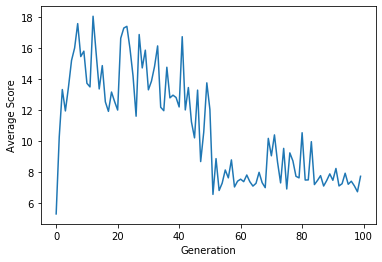

In [21]:
x = []
y = []
for i in range(num_gen):
    x.append(i)

for score in allScores:
    y.append(score[2])
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.plot(x, y)
plt.show()

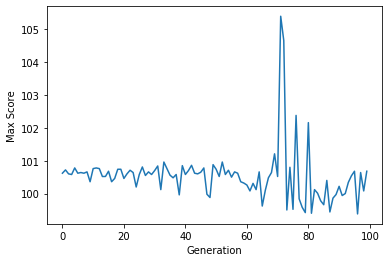

In [22]:
x = []
y = []
for i in range(num_gen):
    x.append(i)
    
for score in allScores:
    y.append(score[1])

plt.xlabel('Generation')
plt.ylabel('Max Score')
plt.plot(x, y)
plt.show()

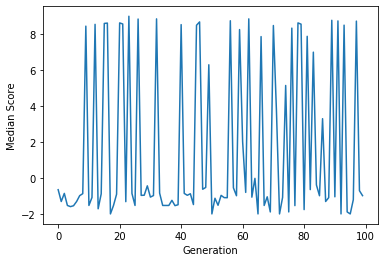

In [23]:
x = []
y = []
for i in range(num_gen):
    x.append(i)
    
for score in allScores:
    y.append(score[3])

plt.xlabel('Generation')
plt.ylabel('Median Score')
plt.plot(x, y)
plt.show()

## Diagnostics

In [24]:
# find all q values that correspond to given team
def find_team_q (q_table, team):
    result = []  
    for entry in q_table.q:
        if entry['team'] == str(team.id):
            result.append(entry)
    return result

# TODO better organize this for quicker analysis
def display_q (result):
    for entry in result:
        print(entry)

In [25]:
# run a given team after training
def post_training_run (env_name, team, epsilon, alpha, discount):
    env.reset()
    l_t, a_t = evaluate(team, env.current_state, epsilon)
    actions = []
    learners = []
    states = []
    #print(states)
    states.append(env.current_state)
    learners.append(l_t)
    actions.append(a_t)
    t = 0
    if env_name == 'fig9':
        t_max = 100
    else:
        t_max = 50
    total_reward = 0
    while t < t_max:
        s_next, reward, isDone = env.step(a_t)
        states.append(s_next)
        learners.append(l_t)
        actions.append(a_t)
        total_reward += reward
        if isDone:
            return states, actions, learners, total_reward
        l_next, a_next = evaluate(team, env.current_state, epsilon)
        #print('State: ' + str(s_next) + ' Action: ' + str(a_next))
        if l_t.id != l_next.id:
            #print('Switching Learners!')
            #print('Learner: ' + str(l_next.id))
            update(team, l_next, a_t, l_t, reward, alpha, epsilon)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return states, actions, learners, total_reward

In [26]:
from tpg.agent import loadAgent
def load_champion(agent_path):
    agent = loadAgent(agent_path)
    agent.configFunctionsSelf()
    print(agent.team)
    return agent.team

In [27]:
# champ = '41';
# champ = load_champion('champions/'+champ+'.pk1')

run = 5
gen = 80
file_name = 'saved-runs/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_'+str(goalReached)+'_'+str(teamPopSize)+'_'+str(pActAtom)+'_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+str(nActRegisters)+'_'+str(initMaxActProgSize)+'_'+str(initMaxTeamSize)+'_'+str(maxTeamSize)+'_'+str(gap)+'_'+str(pLrnDel)+'_'+str(pLrnAdd)+'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+'_'+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_'+str(run)+'_'+str(gen)+'.pk1'
print(file_name)
champ = load_champion(file_name)

state = env.reset()
visited = []
visited.append(state)
print(state)
score = 0

for i in range(50):
    act = champ.act(state, visited)
    state, reward, isDone = env.step(act)
    visited.append(state)
    score += reward
    print(score)
print(score)

#print(runAgent([agent, envName, scoreList, 10, 100, gen, env]))

# #print(champ.q_table)
# for q_value in champ.q_table:
#     print(str(q_value['learner']) + ' ' + str(q_value['action']) + ' ' + str(q_value['q']))

# print('\n\n\n')
# for i in range(10):
#     print('Run: ' + str(i) + ' -----')
#     states, actions, learners, score = post_training_run(envName, champ, epsilon, alpha, discount)
#     print(score)
#     for j in range(len(states)):
#         print(str(states[j]) + '  Action: ' + str(actions[j]) + ' Learner: ' + str(learners[j].id))
#     print('\n\n')
# #print(champ.q_table)
# print('\n\n\n')
# for q_value in champ.q_table:
#     print(str(q_value['learner']) + ' ' + str(q_value['action']) + ' ' + str(q_value['q']))

saved-runs/fig13_20_0.1_-0.01_-0.01_-0.01_100_50_1.0_8_64_0_0_2_4_0.5_0.3_0.2_0.7_0.5_0.0_0.5_0.5_0.5_0.5_1_0.1_0.1_0.9_5_80.pk1


FileNotFoundError: [Errno 2] No such file or directory: 'saved-runs/fig13_20_0.1_-0.01_-0.01_-0.01_100_50_1.0_8_64_0_0_2_4_0.5_0.3_0.2_0.7_0.5_0.0_0.5_0.5_0.5_0.5_1_0.1_0.1_0.9_5_80.pk1'

In [ ]:
%matplotlib notebook
%matplotlib notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
x = [0, 1, 2]
y = [0, 1, 2]

lines = plt.plot([], 'bo')
line = lines[0]

plt.xlim(-5, 5)
plt.ylim(-5, 5)

def animate(frame):
    #line.set_data((0, 1), (states[frame][1], states[frame][0]))
#     obs_x = [1]
#     obs_y = [1]
#     plt.plot(obs_x, obs_y, 'ro')
    # obstacles
    obs_x = [2, 1, 2, 1, 2, 3, 3]
    obs_y = [0, 1, 1, 3, 3, 3, 4]
    # win state
    win_x = [2]
    win_y = [4]
    # the animated trajectory
    #plt.cla()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    traj_x = []
    traj_y = []
    for i in range(frame+1):
        traj_x.append(states[i][0])
        traj_y.append(states[i][1])
    # plot all of the points
    plt.plot(obs_x, obs_y, 'ro')
    plt.plot(win_x, win_y, 'go')
    plt.plot(traj_x, traj_y, 'b-')
    plt.plot(states[frame][0], states[frame][1], 'yo')
        
#anim = FuncAnimation(fig, animate, frames = len(states), interval = 1000)
#plt.grid(alpha=1)
#plt.show()